In [1]:
import numpy as np
import torch
import torchvision
from torchvision import datasets, transforms
from torch import nn, optim
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import torch.nn.functional as F                    # contains function which converts vectors to real values objects

In [2]:
transform = transforms.Compose([transforms.ToTensor(),                  # Compose, composes several transforms together
                                transforms.Normalize((0.5,),(0.5,))     # for better training, normalize it between 0 and 1.
                                ])                                      # here the parameters passed are mean and std deviation

In [3]:
train_set = datasets.MNIST ('./train',                     # directory where we want to store it
                            download = True,               # if data is already download, no need to download it again
                            train = True,                   # this data to be used for training set
                            transform = transform)          # setting value of transform

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./train/MNIST/raw/train-images-idx3-ubyte.gz to ./train/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./train/MNIST/raw/train-labels-idx1-ubyte.gz to ./train/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./train/MNIST/raw/t10k-images-idx3-ubyte.gz to ./train/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./train/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./train/MNIST/raw

Processing...


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Done!


In [4]:
test_set = datasets.MNIST ('./test',
                           download = True,
                           train = False,
                           transform = transform)

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./test/MNIST/raw/train-images-idx3-ubyte.gz to ./test/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./test/MNIST/raw/train-labels-idx1-ubyte.gz to ./test/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./test/MNIST/raw/t10k-images-idx3-ubyte.gz to ./test/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./test/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./test/MNIST/raw

Processing...
Done!


In [5]:
batch_size = 128
trainLoader = DataLoader(train_set, batch_size = batch_size, shuffle = True)
testLoader  = DataLoader(test_set,  batch_size = batch_size, shuffle = True)                # to divide data into smaller chunks

In [6]:
len(train_set), len(test_set)

(60000, 10000)

In [7]:
example = list(enumerate(testLoader))                  # list of enumerate
batch_id, (data, target)= example[0]                   # each element will contain three items, taking the first example
batch_id, data.shape, target.shape                     

(0, torch.Size([128, 1, 28, 28]), torch.Size([128]))

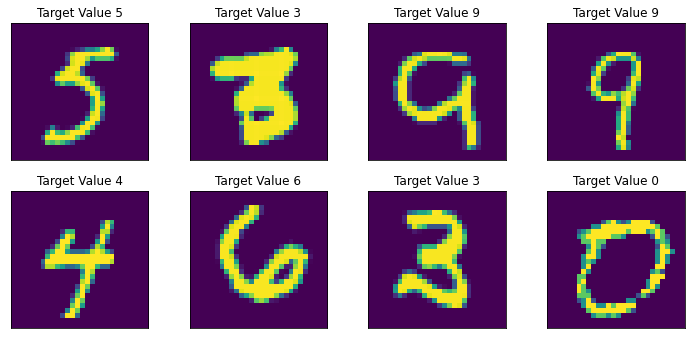

In [8]:
plt.figure(figsize= (10,5))
for i in range(8):                                    # to plot first 8 images
  plt.subplot(2,4,i+1)                                # defining subplots with 2 rows, 4 columns, and corresponding index
  plt.tight_layout()                                  # to make subplots automaticaly adjust padding
  plt.title('Target Value {}'.format(target[i]))      
  plt.imshow(data[i][0])
  plt.xticks([])                                      # no markings on x and y axis
  plt.yticks([])

MLP (MutliLayer Feed forward Perceptron)

In [9]:
input_size = 784           # 1*28*28
output_size = 10           # 10 classes from 0-9
hidden_size = [256, 128, 64]

model = nn.Sequential(nn.Linear(input_size, hidden_size[0]),            # weights, adder, and Relu, layer1
                      nn.ReLU(),
                      nn.Linear(hidden_size[0], hidden_size[1]),        # layer 2
                      nn.ReLU(),
                      nn.Linear(hidden_size[1], hidden_size[2]),        # layer 3
                      nn.ReLU(),
                      nn.Linear(hidden_size[2], output_size),           # last layer, connects to output
                      nn.LogSoftmax(dim = 1)                            # to convert vector to probability
                      )                                                  
model

Sequential(
  (0): Linear(in_features=784, out_features=256, bias=True)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=128, bias=True)
  (3): ReLU()
  (4): Linear(in_features=128, out_features=64, bias=True)
  (5): ReLU()
  (6): Linear(in_features=64, out_features=10, bias=True)
  (7): LogSoftmax(dim=1)
)

In [10]:
# defining the criteria for loss and optimizer

loss_ = nn.NLLLoss()           # Negative LikelyHood Loss for classification
optimizer = optim.SGD(model.parameters(),        # which all paramters of the model will change after optimization
                      lr = 0.003,
                      momentum = 0.9)
epochs = 20

# Training

for i in range(epochs):
  current_loss = 0
  for images, label in trainLoader:

    # First flatten the tensor to 1D
    images = images.view(images.shape[0], -1)       # images.shape[0]= 1, so it arranges itself in 784 columns and 1 row.
    optimizer.zero_grad()                           # sets the gradients to zero before backpropagation so that it doesnot accumulate previous ones.
    output = model(images)                          # feed images to model
    loss = loss_(output, label)                     # calculate the loss
    loss.backward()                                 # backpropagate the loss

    optimizer.step()                                # optimizes the weights
    current_loss += loss.item()                     # calculates loss at each epoch
  else:
    print('Epoch : {}, Training Loss : {}'.format(i, current_loss/len(trainLoader)))





Epoch : 0, Training Loss : 1.1519709476657005
Epoch : 1, Training Loss : 0.3694100732615253
Epoch : 2, Training Loss : 0.29023013265529424
Epoch : 3, Training Loss : 0.24494119849540533
Epoch : 4, Training Loss : 0.20607444369144787
Epoch : 5, Training Loss : 0.1776265719218422
Epoch : 6, Training Loss : 0.1549056720838491
Epoch : 7, Training Loss : 0.1367848035353206
Epoch : 8, Training Loss : 0.12234887593129931
Epoch : 9, Training Loss : 0.10982245841085403
Epoch : 10, Training Loss : 0.09949478226652278
Epoch : 11, Training Loss : 0.08976403031664998
Epoch : 12, Training Loss : 0.08273701942456302
Epoch : 13, Training Loss : 0.07589105432475808
Epoch : 14, Training Loss : 0.06961588753558108
Epoch : 15, Training Loss : 0.06382200264854472
Epoch : 16, Training Loss : 0.059022376128136794
Epoch : 17, Training Loss : 0.05528982849156202
Epoch : 18, Training Loss : 0.05069937177899995
Epoch : 19, Training Loss : 0.046402726831760555


In [28]:
model.eval()                      # put the model in this

with torch.no_grad():
  correct = 0
  total = 0
  for images, labels in testLoader:
    for i in range(len(labels)):

      img = images[i].view(1, 784)
      output = model(img)                                    # this output will give us probabilities, we need to convert them into classes

      _, predicted = torch.max(output.data, 1)               # this will provide us with the class with max probablitiy
      correct += (predicted == labels[i]).sum().item()       # ones which match with labels
    total += labels.size(0)                                  # used to calculate the total size of the labels
     

  print('Test accuracy : {} %'.format(100* correct/total))


Test accuracy : 97.52 %
